In [1]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf
from statsmodels.graphics.regressionplots import influence_plot
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [2]:
wc=pd.read_csv(r"C:\Users\aksha\Downloads\wc-at.csv")

In [3]:
wc['sq_waist']=wc['Waist']*wc['Waist']

In [4]:
eq_model=smf.ols('np.log(AT)~Waist+sq_waist',data=wc).fit()
eq_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             np.log(AT)   R-squared:                       0.779
Model:                            OLS   Adj. R-squared:                  0.775
Method:                 Least Squares   F-statistic:                     186.8
Date:                Tue, 14 May 2024   Prob (F-statistic):           1.80e-35
Time:                        15:22:45   Log-Likelihood:                -24.779
No. Observations:                 109   AIC:                             55.56
Df Residuals:                     106   BIC:                             63.63
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -7.8241      1.473     -5.312      0.000     -10.744      -4.904
Waist          0.2289      0.032      7.107      0.000       0.165       0.293
sq_waist      -0.0010      0.000     -5.871      0.000      -0.001      -0.001
==============================================================================
Omnibus:                        0.325   Durbin-Watson:                   1.464
Prob(Omnibus):                  0.850   Jarque-Bera (JB):                0.271
Skew:                           0.119   Prob(JB):                        0.873
Kurtosis:                       2.949   Cond. No.                     4.49e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.49e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [5]:
np.exp(eq_model.fittedvalues)

0       36.779400
1       31.026570
2       60.145769
3       68.488132
4       36.497176
          ...    
104    134.555999
105    108.012957
106    140.081911
107    154.205675
108    155.034904
Length: 109, dtype: float64

In [6]:
eqmse=mean_squared_error(wc['AT'],np.exp(eq_model.fittedvalues))
eqrmse=np.sqrt(eqmse)
print(eqmse,eqrmse,eq_model.rsquared)

1039.704415717305 32.24444782776261 0.7789817667713609


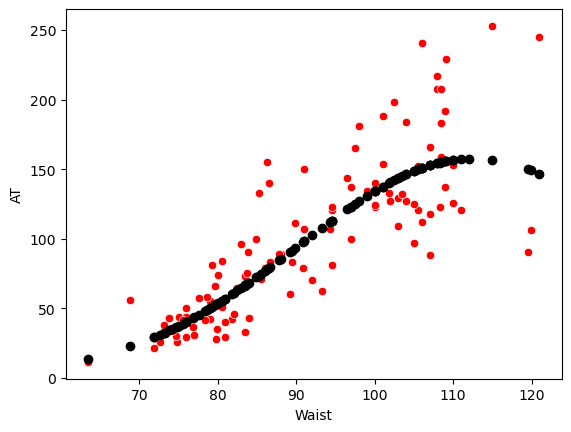

In [7]:
sns.scatterplot(y='AT',x='Waist',data=wc,color='red')
plt.scatter(wc['Waist'],np.exp(eq_model.fittedvalues),color='black')
plt.show()

### Model Validation

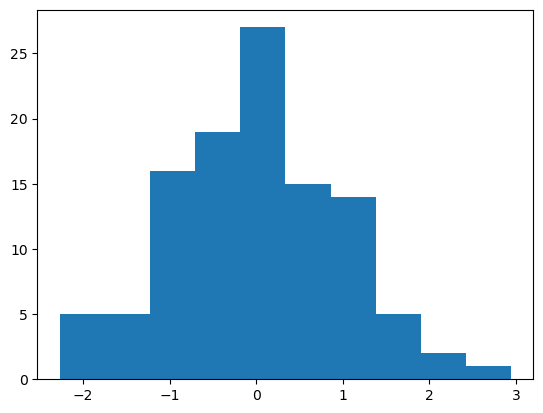

In [8]:
plt.hist(eq_model.resid_pearson)
plt.show() #resid_pearson is the standardized resid

### here the standarized errors should have mean =0 and they are having constant varience frommean value,then the model is a valid model

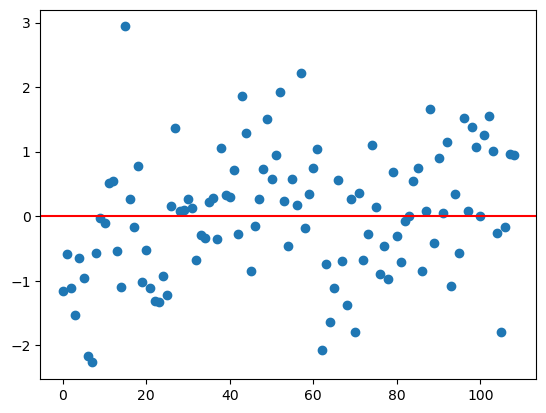

In [9]:
plt.scatter(x=np.arange(0,109),y=eq_model.resid_pearson)
plt.axhline(y=0,color='red')

### the mean  of the residual values will be close to 0 and will have constant varience from mean, the points laying far away is called outliers

In [10]:
eq_model.resid_pearson.mean()#close to zero

4.220735891270691e-12

<Axes: >

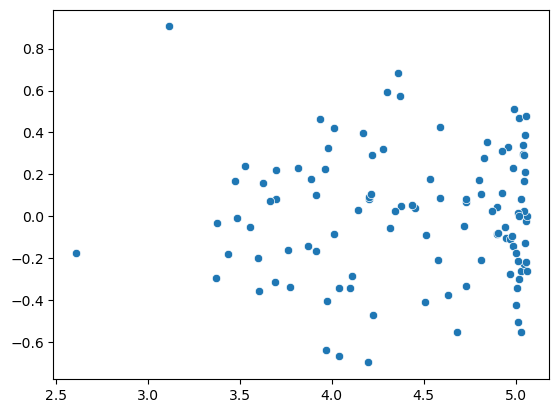

In [12]:
sns.scatterplot(y=eq_model.resid,x=eq_model.fittedvalues)